# Spring Mass

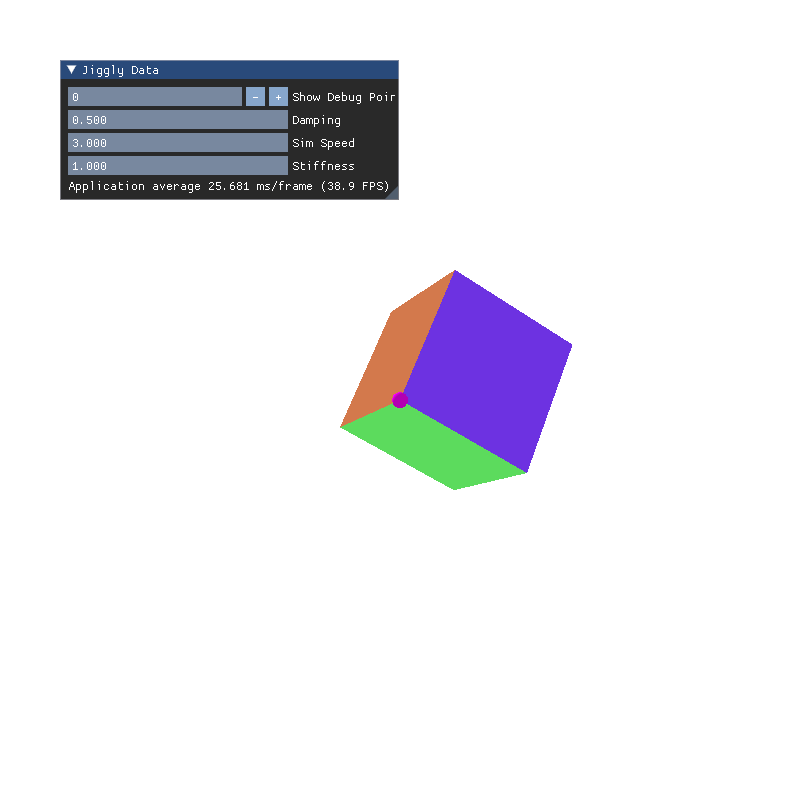

In [16]:
import os
import sys
import pathlib

parentdir = os.path.dirname(pathlib.Path().resolve())

sys.path.insert(0, parentdir) 

import run_example

name = run_example.ScreenShotExample(os.path.abspath(pathlib.Path().resolve()), capture_frame=40)

from IPython.display import Image

Image(filename=f'Documentation/{name}.png')

This is the first example of a physics system in the engine. A spring-mass model is a very simple concept. It consists on a graph where the vertices are imbued with a mass property and the edges are imbued with spring physical properties, hence "spring-mass". The idea is that if a force is applied to one of the vertices, the springs will pull things back ver time to their original form, which looks, approximatively, as a soft body when simulated.

This not a good representation of how actual cloth behaves, but for many purposes it is good enough. It is also a good introduction to numerical simulation for physics. A spring is modeled by Hooke's law, i.e. the equation:

$$F=xk$$

Where $F$ is the current fore beign applied to the ends of the spring, $x$ is the current stretching from the original position, and $k$ is a spring specific scalar constant.

In [13]:
import pathlib
import os, sys
import re
import svgutils
from IPython.display import SVG, display, HTML
from IPython.display import clear_output

parent = os.path.dirname(pathlib.Path().resolve())

sys.path.append(parent)
from diagram_utils import *

scale = 8
c.items.clear()
c.layers.clear()

DrawLine( np.array((0, 0)) * scale, np.array((1.5, 0)) * scale, tcolor=light_red, stroke=SOLID_LINE, width=0.02 * scale)
DrawLine( np.array((0, 0)) * scale, np.array((1, 0)) * scale, tcolor=light_green, stroke=SOLID_LINE, width=0.02 * scale)
DrawPoint(np.array((1, 0)) * scale, 0.035 * scale, tcolor=light_red)
DrawPoint(np.array((0, 0)) * scale, 0.05 * scale, tcolor=light_green)
DrawPoint(np.array((1.5, 0)) * scale, 0.05 * scale, tcolor=light_red)

DrawArrow( np.array((1.05, 0.13)) * scale, np.array((1.45, 0.13)) * scale, tcolor=light_red, width=0.02 * scale, cap_size=0.3)

DrawText(np.array((1.25, 0.25)) * scale, r"$x$", tcolor=(0,0,0), scale=3)

DrawArrow( np.array((1.45, -0.13)) * scale, np.array((0.05, -0.13)) * scale, tcolor=light_red, width=0.02 * scale, cap_size=0.1)

DrawText(np.array((0.75, -0.25)) * scale, r"$F=-kx$", tcolor=(0,0,0), scale=3)

image_path = os.path.join("Documentation", f"SpringMass")
pathlib.Path("Documentation").mkdir(parents=True, exist_ok=True)
c.writeSVGfile(image_path)

clear_output()
svg_file = image_path + '.svg'
display(HTML(f"<table><tr><td><img src='{svg_file}'></td></tr></table>"))

In the above diagram, one of the endpoints is displaced by $x$ units from the rest position of the spring (indicated by a samll red circle). This displacement induces a force of $kx$ force units in the negative direction on the right endpoint (and the opposite force is simultaneously applied to the leftmost endpoint).

Generalizing Hooke's law to 3 dimensions is trivial as we only need to replace $x$ with lengths of vectors. This is how we compute the forces in our spring mass model.